<a href="https://colab.research.google.com/github/ShireenPatel/speech-emotion-recognition/blob/master/SVM%2C%20Decision%20Tree%2C%20CNN%20on%20RAVDESS%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 86kB/s 
     |████████████████████████████████| 3.2MB 36.6MB/s 
     |████████████████████████████████| 491kB 48.3MB/s 
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import files
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"patelshireendharmesh","key":"a383b88dc708b648ed3d3741fbd96af0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 99% 425M/429M [00:06<00:00, 96.0MB/s]
100% 429M/429M [00:06<00:00, 69.8MB/s]


In [ ]:
!ls

drive  kaggle.json  ravdess-emotional-speech-audio.zip	sample_data


In [ ]:
!mkdir ravdess
!unzip ravdess-emotional-speech-audio.zip -d ravdess

Archive:  ravdess-emotional-speech-audio.zip
  inflating: ravdess/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-02-02-01.wav  
  inflating: ravdess/Actor_01/03-01-03-02-0

In [ ]:
!pip install librosa
import librosa
from librosa import display
import os
import pandas as pd
import glob
import numpy as np 

In [ ]:
import time

path = '/content/ravdess'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=200).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 466.6064302921295 seconds ---


In [ ]:
X, y = zip(*lst)
X = np.asarray(X)
y = np.asarray(y)

X.shape, y.shape

((2880, 128), (2880,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        64
           1       0.84      0.81      0.83       135
           2       0.72      0.77      0.75       122
           3       0.64      0.70      0.67       115
           4       0.76      0.76      0.76       134
           5       0.78      0.83      0.80       126
           6       0.78      0.75      0.76       121
           7       0.86      0.72      0.78       134

    accuracy                           0.77       951
   macro avg       0.77      0.77      0.77       951
weighted avg       0.77      0.77      0.77       951



In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
# Building the SVM model 
svmclf = SVC() 
svmclf.fit(X_train, y_train) 
  
# Storing the predictions of the non-linear model 
y_pred_svmclf = svmclf.predict(X_test) 
  
# Evaluating the performance of the non-linear model 
print('Accuracy : '+str(accuracy_score(y_test, y_pred_svmclf))) 

Accuracy : 0.3017875920084122


CNN

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
x_traincnn.shape, x_testcnn.shape, y_train.shape, y_test.shape

((1929, 128, 1), (951, 128, 1), (1929,), (951,))

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(32, 5,padding='same',
                 input_shape=(128,1)))
model.add(Conv1D(64, 5,padding='same', activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 128, 32)           192       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 128, 64)           10304     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
cnnhistory=model.fit(x_traincnn, y_train, batch_size=128, epochs=500, validation_data=(x_testcnn, y_test))

Train on 1929 samples, validate on 951 samples
Epoch 1/500
1929/1929 [==============================] - 1s 553us/step - loss: 12.5559 - accuracy: 0.1374 - val_loss: 2.1740 - val_accuracy: 0.1409
Epoch 2/500
1929/1929 [==============================] - 1s 449us/step - loss: 2.6215 - accuracy: 0.1436 - val_loss: 2.0785 - val_accuracy: 0.1209
Epoch 3/500
1929/1929 [==============================] - 1s 436us/step - loss: 2.2102 - accuracy: 0.1436 - val_loss: 2.0778 - val_accuracy: 0.1209
Epoch 4/500
1929/1929 [==============================] - 1s 446us/step - loss: 2.1391 - accuracy: 0.1514 - val_loss: 2.0766 - val_accuracy: 0.1220
Epoch 5/500
1929/1929 [==============================] - 1s 452us/step - loss: 2.1027 - accuracy: 0.1457 - val_loss: 2.0747 - val_accuracy: 0.1230
Epoch 6/500
1929/1929 [==============================] - 1s 453us/step - loss: 2.0905 - accuracy: 0.1633 - val_loss: 2.0592 - val_accuracy: 0.1209
Epoch 7/500
1929/1929 [==============================] - 1s 465us/step

In [ ]:
score = model.evaluate(x_testcnn, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8190055634947856
Test accuracy: 0.7371188402175903


In [ ]:
predictions = model.predict_classes(x_testcnn)
predictions
y_test
new_Ytest = y_test.astype(int)
new_Ytest

array([7, 5, 3, 3, 6, 7, 5, 5, 7, 3, 1, 3, 1, 2, 5, 4, 4, 3, 3, 3, 1, 7,
       2, 2, 2, 1, 1, 3, 4, 2, 0, 2, 1, 1, 7, 5, 1, 7, 7, 5, 4, 0, 4, 6,
       7, 2, 5, 3, 3, 5, 5, 2, 4, 4, 6, 5, 7, 2, 7, 3, 4, 6, 5, 6, 3, 6,
       5, 5, 7, 5, 4, 6, 1, 3, 6, 1, 3, 1, 6, 1, 2, 4, 1, 6, 4, 5, 3, 5,
       0, 6, 4, 4, 1, 4, 1, 5, 4, 4, 6, 2, 3, 4, 2, 6, 2, 5, 2, 1, 5, 3,
       4, 4, 5, 1, 3, 6, 1, 7, 5, 7, 1, 0, 6, 1, 4, 3, 0, 2, 5, 3, 2, 6,
       2, 2, 6, 5, 3, 1, 0, 5, 1, 6, 5, 5, 5, 3, 7, 1, 1, 4, 0, 6, 5, 6,
       6, 1, 6, 1, 4, 1, 6, 2, 6, 6, 1, 5, 1, 6, 2, 3, 3, 2, 5, 5, 6, 5,
       1, 4, 7, 1, 3, 6, 3, 3, 0, 0, 5, 2, 7, 2, 4, 3, 7, 2, 4, 3, 1, 6,
       3, 2, 1, 4, 6, 2, 7, 0, 5, 2, 4, 7, 0, 3, 2, 5, 3, 5, 3, 1, 4, 7,
       7, 7, 3, 4, 2, 3, 5, 6, 5, 1, 7, 1, 4, 1, 7, 4, 6, 7, 3, 0, 2, 6,
       5, 4, 7, 7, 7, 1, 2, 7, 5, 1, 1, 1, 6, 0, 0, 6, 6, 4, 3, 7, 5, 7,
       4, 3, 7, 7, 7, 5, 7, 2, 2, 2, 6, 3, 3, 6, 3, 2, 3, 1, 2, 3, 4, 0,
       3, 4, 4, 2, 2, 0, 3, 2, 2, 2, 0, 5, 1, 4, 0,

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.59      0.60        64
           1       0.77      0.84      0.80       135
           2       0.59      0.79      0.67       122
           3       0.68      0.68      0.68       115
           4       0.93      0.71      0.81       134
           5       0.73      0.74      0.74       126
           6       0.83      0.70      0.76       121
           7       0.79      0.76      0.78       134

    accuracy                           0.74       951
   macro avg       0.74      0.73      0.73       951
weighted avg       0.75      0.74      0.74       951



In [ ]:
!pip install pydub
from scipy.io import wavfile
import wave
import struct
from struct import *
import matplotlib.pyplot as plt
!pip install keras==2.1.5
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_train= MinMaxScaler().fit_transform(X)
x_train.shape

(2880, 128)

In [ ]:
encoding_dim = 64
input_img = Input(shape=(128,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(128, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


filepath="audio.compress-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='binary_crossentropy', verbose=1, save_best_only=False)
autoencoder.summary()
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_train, x_train),callbacks=[checkpoint],verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
Total params: 16,576
Trainable params: 16,576
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: saving model to audio.compress-0.6970.hdf5

Epoch 00002: saving model to audio.compress-0.6890.hdf5

Epoch 00003: saving model to audio.compress-0.6860.hdf5

Epoch 00004: saving model to audio.compress-0.6836.hdf5

Epoch 00005: saving model to audio.compress-0.6814.hdf5

Epoch 00006: saving model to audio.compress-0.6797.hdf5

Epoch 00007: saving model to audio.compres

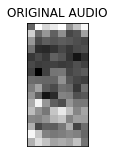

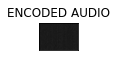

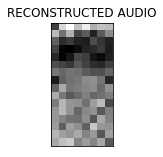

Accuracy= 0.9058661228908634 



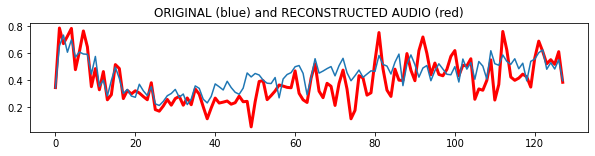

In [ ]:
filename = "audio.compress-0.6661.hdf5"
autoencoder.load_weights(filename)
autoencoder.compile(loss='mean_squared_error', optimizer='adam')
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)

n = 1  # how many files we will display
plt.figure(figsize=(10, 5))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(16,8 ))
    plt.title("ORIGINAL AUDIO")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(8, .5))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs.reshape(512,360).T)
    plt.title('ENCODED AUDIO')    
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(10, 5))
for i in range(n):
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(16,8 ))
    plt.title("RECONSTRUCTED AUDIO")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Accuracy=",1-np.mean(abs(x_train-decoded_imgs)),'\n')

plt.figure(figsize=(10, 2))
plt.plot(x_train[0],color='r',linewidth=3)
plt.plot(decoded_imgs[0])
plt.title('ORIGINAL (blue) and RECONSTRUCTED AUDIO (red)')
plt.show()

In [ ]:
decoded_imgs.shape

(2880, 128)

In [ ]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(decoded_imgs, y, test_size=0.33, random_state=42)

In [ ]:
# Building the SVM model 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
svmclf = SVC() 
svmclf.fit(X_train_encoded, y_train_encoded) 
  
# Storing the predictions of the non-linear model 
y_pred_svmclf = svmclf.predict(X_test_encoded) 
  
# Evaluating the performance of the non-linear model 
print('Accuracy : '+str(accuracy_score(y_test_encoded, y_pred_svmclf))) 

Accuracy : 0.40168243953732913


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train_encoded, y_train_encoded)

predictions = dtree.predict(X_test_encoded)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_encoded,predictions))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        64
           1       0.83      0.75      0.79       135
           2       0.83      0.80      0.82       122
           3       0.67      0.72      0.70       115
           4       0.77      0.73      0.75       134
           5       0.72      0.83      0.77       126
           6       0.77      0.70      0.73       121
           7       0.72      0.76      0.74       134

    accuracy                           0.76       951
   macro avg       0.76      0.76      0.76       951
weighted avg       0.76      0.76      0.76       951



CNN

In [ ]:
x_traincnn_encoded = np.expand_dims(X_train_encoded, axis=2)
x_testcnn_encoded = np.expand_dims(X_test_encoded, axis=2)
x_traincnn_encoded.shape, x_testcnn_encoded.shape, y_train_encoded.shape, y_test_encoded.shape

((1929, 128, 1), (951, 128, 1), (1929,), (951,))

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(32, 5,padding='same',
                 input_shape=(128,1)))
model.add(Conv1D(64, 5,padding='same', activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
#opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 128, 32)           192       
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 128, 64)           10304     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 64)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               131200    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)              

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
cnnhistory_encoded=model.fit(x_traincnn_encoded, y_train_encoded, batch_size=128, epochs=1000, validation_data=(x_testcnn_encoded, y_test_encoded))

Train on 1929 samples, validate on 951 samples
Epoch 1/1000
1929/1929 [==============================] - 1s 643us/step - loss: 2.0721 - accuracy: 0.1369 - val_loss: 2.0612 - val_accuracy: 0.1504
Epoch 2/1000
1929/1929 [==============================] - 1s 442us/step - loss: 2.0681 - accuracy: 0.1426 - val_loss: 2.0585 - val_accuracy: 0.1272
Epoch 3/1000
1929/1929 [==============================] - 1s 447us/step - loss: 2.0640 - accuracy: 0.1467 - val_loss: 2.0588 - val_accuracy: 0.1272
Epoch 4/1000
1929/1929 [==============================] - 1s 446us/step - loss: 2.0626 - accuracy: 0.1322 - val_loss: 2.0621 - val_accuracy: 0.1651
Epoch 5/1000
1929/1929 [==============================] - 1s 430us/step - loss: 2.0628 - accuracy: 0.1395 - val_loss: 2.0535 - val_accuracy: 0.1535
Epoch 6/1000
1929/1929 [==============================] - 1s 442us/step - loss: 2.0568 - accuracy: 0.1457 - val_loss: 2.0549 - val_accuracy: 0.1325
Epoch 7/1000
1929/1929 [==============================] - 1s 433u

In [ ]:
score = model.evaluate(x_testcnn_encoded, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8852590443458718
Test accuracy: 0.7981072664260864


In [ ]:
predictions = model.predict_classes(x_testcnn_encoded)
predictions
y_test_encoded
new_Ytest_encoded = y_test_encoded.astype(int)
new_Ytest_encoded

array([7, 5, 3, 3, 6, 7, 5, 5, 7, 3, 1, 3, 1, 2, 5, 4, 4, 3, 3, 3, 1, 7,
       2, 2, 2, 1, 1, 3, 4, 2, 0, 2, 1, 1, 7, 5, 1, 7, 7, 5, 4, 0, 4, 6,
       7, 2, 5, 3, 3, 5, 5, 2, 4, 4, 6, 5, 7, 2, 7, 3, 4, 6, 5, 6, 3, 6,
       5, 5, 7, 5, 4, 6, 1, 3, 6, 1, 3, 1, 6, 1, 2, 4, 1, 6, 4, 5, 3, 5,
       0, 6, 4, 4, 1, 4, 1, 5, 4, 4, 6, 2, 3, 4, 2, 6, 2, 5, 2, 1, 5, 3,
       4, 4, 5, 1, 3, 6, 1, 7, 5, 7, 1, 0, 6, 1, 4, 3, 0, 2, 5, 3, 2, 6,
       2, 2, 6, 5, 3, 1, 0, 5, 1, 6, 5, 5, 5, 3, 7, 1, 1, 4, 0, 6, 5, 6,
       6, 1, 6, 1, 4, 1, 6, 2, 6, 6, 1, 5, 1, 6, 2, 3, 3, 2, 5, 5, 6, 5,
       1, 4, 7, 1, 3, 6, 3, 3, 0, 0, 5, 2, 7, 2, 4, 3, 7, 2, 4, 3, 1, 6,
       3, 2, 1, 4, 6, 2, 7, 0, 5, 2, 4, 7, 0, 3, 2, 5, 3, 5, 3, 1, 4, 7,
       7, 7, 3, 4, 2, 3, 5, 6, 5, 1, 7, 1, 4, 1, 7, 4, 6, 7, 3, 0, 2, 6,
       5, 4, 7, 7, 7, 1, 2, 7, 5, 1, 1, 1, 6, 0, 0, 6, 6, 4, 3, 7, 5, 7,
       4, 3, 7, 7, 7, 5, 7, 2, 2, 2, 6, 3, 3, 6, 3, 2, 3, 1, 2, 3, 4, 0,
       3, 4, 4, 2, 2, 0, 3, 2, 2, 2, 0, 5, 1, 4, 0,

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest_encoded, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.75      0.74        64
           1       0.84      0.95      0.89       135
           2       0.83      0.71      0.77       122
           3       0.84      0.71      0.77       115
           4       0.76      0.87      0.81       134
           5       0.71      0.81      0.76       126
           6       0.79      0.77      0.78       121
           7       0.88      0.77      0.82       134

    accuracy                           0.80       951
   macro avg       0.80      0.79      0.79       951
weighted avg       0.80      0.80      0.80       951

